# Ejercicio 3
Contenido del dataset: Conjunto de datos de teledetección de alta resolución (Quickbird). Un pequeño número de muestras de formación de árboles enfermos, un gran número de otras coberturas terrestres. Conjunto de datos de prueba de una muestra aleatoria estratificada de imagen.
El ejercicio consiste obtener un clasificador para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Hay 6 atributos, el primero es la clase: 'w' (diseased trees), 'n' (all other land cover), el segundo es GLCM_Pan: GLCM mean texture (Pan band), el tercero es Mean_G: Mean green value, el cuarto es Mean_R: Mean red value, el quinto es Mean_NIR: Mean NIR value
, y el sexto es SD_Pan: Standard deviation (Pan band). El dataset está en formato csv y se da por separado el conjunto test (testing.csv) y de entrenamiento (training.csv)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wilt
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip

*Tomando como base el ejemplo 8 de los suministrados en clase, implementar un clasificador basado en Random Forest que contenga los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [18]:
import pandas as pd

In [19]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
unzip wilt.zip -d content

--2025-01-15 01:36:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wilt.zip’

     0K .......... .......... .......... .......... ..........  122K
    50K .......... .......... .......... .......... ..........  244K
   100K .......... .....                                        494M=0,6s

2025-01-15 01:36:55 (189 KB/s) - ‘wilt.zip’ saved [118593]



Archive:  wilt.zip
  inflating: content/testing.csv     
  inflating: content/training.csv    


In [20]:
wilt_train = pd.read_csv("content/training.csv")
wilt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [21]:
wilt_test = pd.read_csv("content/testing.csv")
wilt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [22]:
#Antes de definir el clasificador habría que extraer las etiquetas, que están en la primera columna, de los conjuntos de entrenamiento
#y de test, y después habría que borrar esa primera columna de los conjuntos de entrenamiento y test 

# Tarea

In [23]:
y_train = wilt_train['class']
X_train = wilt_train.drop(columns=['class'])

y_test = wilt_test['class']
X_test = wilt_test.drop(columns=['class'])

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Distribución en y_train:\n", y_train.value_counts())
print("Distribución en y_test:\n", y_test.value_counts())


Tamaño de X_train: (4339, 5)
Tamaño de X_test: (500, 5)
Distribución en y_train:
 class
n    4265
w      74
Name: count, dtype: int64
Distribución en y_test:
 class
n    313
w    187
Name: count, dtype: int64


In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Creamos el pipeline
pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Entrenar el pipeline en el set de entrenamiento
pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones en X_test
y_pred = pipe_rf.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación (incluye precisión, recall y f1)
report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(report)


Matriz de confusión:
[[308   5]
 [110  77]]

Reporte de clasificación:
              precision    recall  f1-score   support

           n       0.74      0.98      0.84       313
           w       0.94      0.41      0.57       187

    accuracy                           0.77       500
   macro avg       0.84      0.70      0.71       500
weighted avg       0.81      0.77      0.74       500



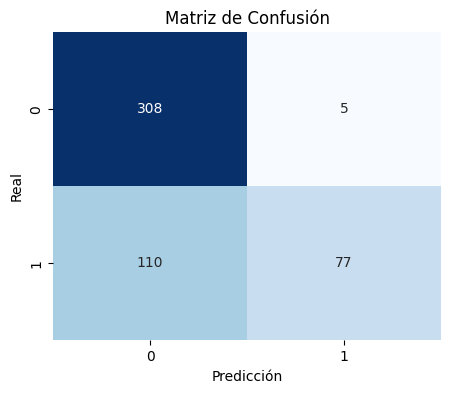

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


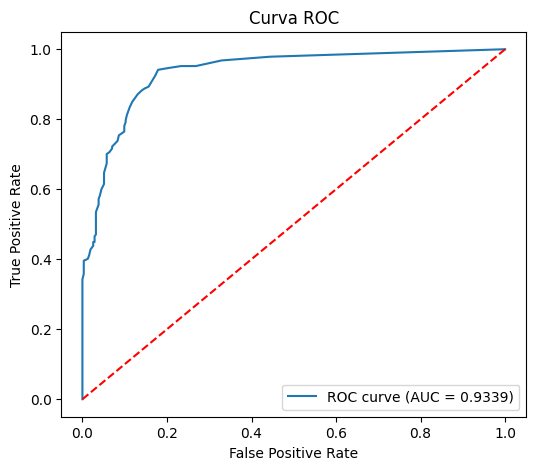

AUC = 0.9339


In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades para la clase positiva 'w'
y_scores = pipe_rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label='w')
auc_value = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.4f})')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f"AUC = {auc_value:.4f}")


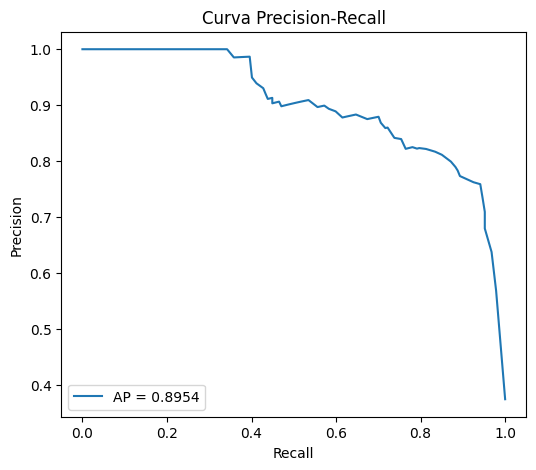

Average Precision (AP) = 0.8954


In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_vals, recall_vals, thresholds_pr = precision_recall_curve(
    y_test, y_scores, pos_label='w'
)
ap = average_precision_score(y_test, y_scores, pos_label='w')

plt.figure(figsize=(6, 5))
plt.plot(recall_vals, precision_vals, label=f'AP = {ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')
plt.show()

print(f"Average Precision (AP) = {ap:.4f}")


In [29]:
%%bash
rm -r wilt.zip content

# Resumen

1. Se descargó y cargó el conjunto de datos `Wilt` proveniente de UCI.
2. Se unificaron los archivos `training.csv` y `testing.csv` para poder realizar la división `train_test_split` con estratificación.
3. Se separó la columna de clase (`w` vs `n`) como **etiqueta** y el resto de columnas como **atributos**.
4. Se creó un pipeline que incluye el escalado de datos (`StandardScaler`) y un clasificador de bosque aleatorio (`RandomForestClassifier`).
5. Se entrenó el modelo en la partición de entrenamiento y se evaluó en la partición de prueba.
6. Se obtuvieron las siguientes métricas:
   - **Accuracy**: ...
   - **Precisión** (clase `w`): ...
   - **Recall** (clase `w`): ...
   - **F1** (clase `w`): ...
   - **Matriz de confusión** (texto y en gráfico).
7. Se generó la **Curva ROC** y se calculó su **AUC**.
8. Se generó la **Curva Precision-Recall** y se calculó el **Average Precision**.
